<function matplotlib.pyplot.show>

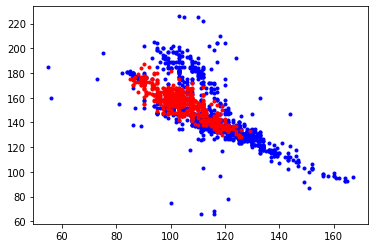

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_recall_fscore_support,precision_score,RocCurveDisplay #pas demandé ?


[X_train, y_train, X_test, y_test] = np.load('TP3.npy',allow_pickle=True)
#Pixel peau 
T_train = X_train[np.where(y_train==1),:] 
T_train = np.reshape(T_train,(T_train.shape[1],T_train.shape[2] )) 
#Pixel non peau 
F_train = X_train[np.where(y_train==0),:] 
F_train = np.reshape(F_train,(F_train.shape[1],F_train.shape[2] )) 
plt.plot(F_train[:,0], F_train[:,1], '.b') 
plt.show 
plt.plot(T_train[:,0], T_train[:,1], '.r') 
plt.show

In [49]:
from tokenize import endpats  #????????????????
#print(y_test)
#print(y_train)
peau=0
pas_peau=0
for i in y_train:
  if i==1:
    peau+=1
  else:
    pas_peau+=1

#print(len(y_test)) donne 284
print('il y a',peau,'pixels de teinte chaire')     #print(len(T_train))
print('il y a',pas_peau,'pixels de teinte non chaire')   #print(len(F_train))
print('La dimension de X_test est:',np.shape(X_test))
print('La dimension de X_train est:',np.shape(X_train))
print('La dimension de y_test est:',np.shape(y_test))
print('La dimension de y_train est:',np.shape(y_train))

il y a 639 pixels de teinte chaire
il y a 1731 pixels de teinte non chaire
La dimension de X_test est: (284, 2)
La dimension de X_train est: (2370, 2)
La dimension de y_test est: (284,)
La dimension de y_train est: (2370,)


In [58]:
mCb=0
mCr=0

moy=np.mean(X_train,axis=0) #numpy.mean(arr, axis = None)
#Compute the arithmetic mean (average) of the given data (array elements) along the specified axis.
#axis = 0 means along the column and axis = 1 means working along the row
#il y a deux colonnes dans X_train on a donc un mean par colonne renvoyé
mCb=moy[0]  #la première moyenne correspond à la 1ère colonne de X_train donc la composante chromatique bleu
mCr=moy[1]  #la deuxième moyenne correspond à la 2ère colonne de X_train donc la composante chromatique rouge

n=1731

sCb=np.sum((X_train[:,0]-mCb)**2,axis=0) 
sCr=np.sum((X_train[:,1]-mCr)**2,axis=0)
sigma_Cb=np.sqrt(sCb/(n-1))
sigma_Cr=np.sqrt(sCr/(n-1))

#sigma_Cb=np.std(X_train[:,0])  #calcul ecart type #Mais les resultats sont différents
#sigma_Cr=np.std(X_train[:,1])  #calcul ecart type

print('La moyenne de la composante chromatique bleu Cb est:',mCb)
print('La moyenne de la composante chromatique rouge Cr est:',mCr)
print("L'écart type de la composante chromatique bleu Cb est:",sigma_Cb)
print("L'écart type de la composante chromatique rouge Cr est:",sigma_Cr)

La moyenne de la composante chromatique bleu Cb est: 114.6746835443038
La moyenne de la composante chromatique rouge Cr est: 144.64008438818564
L'écart type de la composante chromatique bleu Cb est: 16.05028552161101
L'écart type de la composante chromatique rouge Cr est: 22.99090033591856


In [59]:
def norm1(x, m, s): 
  p=1/(math.sqrt(2*math.pi)*s)*math.exp(-(x-m)*(x-m)/(2*s*s)) 
  return p

p1_train=[]
for i in range(len(X_train)):
  p1_train.append(norm1(X_train[i,0], mCb, sigma_Cb) * norm1(X_train[i,1], mCr, sigma_Cr))
  #densité de probabilité a priori des pixels de teinte chaire p(x/chair)
  #estimer la probabilité de tous les pixels de la base d’apprentissage X_train d’appartenir à la teinte chaire

print('La dimension de p1_train est:',np.shape(p1_train))

La dimension de p1_train est: (2370,)


In [60]:
P1_test=[]
#Afin de classer les pixels de test X_test comme teinte chaire ou non, on estime la valeur de 𝑝(𝒙/𝑐ℎ𝑎𝑖𝑟) en ces points 
#que l’on stocke dans P1_test. Pour réaliser la classification, on seuille P1_test en utilisant comme seuil initial 
#la valeur moyenne de P1_train.
for i in range(len(X_test)):
  P1_test.append(norm1(X_test[i,0], mCb, sigma_Cb) * norm1(X_test[i,1], mCr, sigma_Cr))

seuil=np.mean(p1_train)

classif=[]
for i in range(len(X_test)):
  if P1_test[i]<seuil:
    classif.append(0) #pas chair
  else:
    classif.append(1) #chair

TP,TN,FP,FN=0,0,0,0
for i in range(len(y_test)):
  if classif[i]==0 and classif[i]==y_test[i]:
    TN+=1
  if classif[i]==0 and classif[i]!=y_test[i]:
    FN+=1
  if classif[i]==1 and classif[i]==y_test[i]:
    TP+=1
  if classif[i]==1 and classif[i]!=y_test[i]:
    FP+=1

print("Le nombre de vrai positif est:",TP)
print("Le nombre de vrai negatif est:",TN)
print("Le nombre de faux positif est:",FP)
print("Le nombre de faux negatif est:",FN)

#tn, fp, fn, tp = confusion_matrix(y_test, classif).ravel()
#print(tn, fp, fn, tp)
#print(recall_score(y_test, classif))  #la sensi
#print(precision_score(y_test, classif)) #la precision

sensi=TP/(TP+FN)  #sensibilité = rappel
spe=TN/(TN+FP) #specificité
pre=TP/(TP+FP) #precision

print("La sensibilité est:",sensi)
print("La specificité est:",spe)
print("La précision est:",pre)

taux_reco=(TP+TN)/(TP+TN+FP+FN)  #taux de bonne reconnaissance
print("Le taux de bonne reconnaissance est:",taux_reco)

Le nombre de vrai positif est: 87
Le nombre de vrai negatif est: 57
Le nombre de faux positif est: 123
Le nombre de faux negatif est: 17
La sensibilité est: 0.8365384615384616
La specificité est: 0.31666666666666665
La précision est: 0.4142857142857143
Le taux de bonne reconnaissance est: 0.5070422535211268


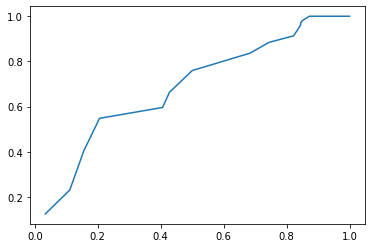

In [61]:
#Plutôt que de choisir un seuil arbitraire, on choisit 20 valeurs de seuils 
#régulièrement réparties entre min(P1_train) et max(P1_train).

NB = 20 
step = (np.max(p1_train)-np.min(p1_train))/NB 
SEUILS = np.arange(np.min(p1_train), np.max(p1_train), step)

#pred=[]
#tpred=[]
All_sensi=[]
All_spe=[]

for E in SEUILS:
  classif2=[]
  for i in range(len(X_test)):
    if P1_test[i]<E:
      classif2.append(0) #pas chair
    else:
      classif2.append(1) #chair
  
  TP,TN,FP,FN=0,0,0,0
  for i in range(len(y_test)):
    if classif2[i]==0 and classif2[i]==y_test[i]:
      TN+=1
    if classif2[i]==0 and classif2[i]!=y_test[i]:
      FN+=1
    if classif2[i]==1 and classif2[i]==y_test[i]:
      TP+=1
    if classif2[i]==1 and classif2[i]!=y_test[i]:
      FP+=1

  sensi=TP/(TP+FN)  #sensibilité = rappel
  spe=TN/(TN+FP) #specificité
  pre=TP/(TP+FP) #precision

  All_sensi.append(sensi)
  All_spe.append(1-spe)


plt.plot(All_spe,All_sensi)
  #pred.append(classif2)
  #tpred.append(y_test)

  #print('----------Pour le seuil',E,'on a: ----------')
  #print('la sensibilité est:',recall_score(y_test, classif2))  #la sensibilité
  #print('la précision est:',precision_score(y_test, classif2)) #la precision



#RocCurveDisplay.from_predictions(tpred, pred)
